In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('../data/challenge_set.csv')

In [8]:
df.columns.tolist()

['flight_id',
 'date',
 'callsign',
 'adep',
 'name_adep',
 'country_code_adep',
 'ades',
 'name_ades',
 'country_code_ades',
 'actual_offblock_time',
 'arrival_time',
 'aircraft_type',
 'wtc',
 'airline',
 'flight_duration',
 'taxiout_time',
 'flown_distance',
 'tow']

In [4]:
df

,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,arrival_time,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,tow
0,249536558,2022-02-14,a08e3bfe1942aa14f9a19c4da321906f,LTFM,iGA Istanbul,TR,LIRF,Rome Fiumicino,IT,2022-02-14T06:11:00Z,2022-02-14T08:41:29Z,A321,M,6351ec1b849adacc0cbb3b1313d8d39b,125,25,793,76571
1,249875453,2022-03-03,3de9465b2413886603abf704936dd3d9,LOWW,Vienna,AT,LROP,Bucharest Otopeni,RO,2022-03-03T11:43:00Z,2022-03-03T13:05:33Z,A321,M,5d407cb11cc29578cc3e292e743f5393,70,13,456,71719
2,255438431,2022-09-18,6000da84c0f70d2eca2049e451074005,ENGM,Oslo,NO,LTFM,iGA Istanbul,TR,2022-09-18T09:48:00Z,2022-09-18T13:32:43Z,A321,M,6351ec1b849adacc0cbb3b1313d8d39b,213,12,1483,85731
3,253231243,2022-07-08,f9b6c3be4fbaa1e411c0e90fc34ebc4d,KMLB,"Melbourne, USA",US,EGPH,Edinburgh,GB,2022-07-08T00:06:00Z,2022-07-08T07:44:17Z,B788,H,3922524069809ac4326134429751e26f,448,10,3690,178632
4,253574989,2022-07-19,6a594e82ea696da397f78f391ab75800,EGCC,Manchester,GB,EIDW,Dublin,IE,2022-07-19T16:27:00Z,2022-07-19T17:20:28Z,A320,M,a73f82288988b79be490c6322f4c32ed,36,17,181,61756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369008,257879813,2022-12-22,759af72400d10e6be10ab87f832de7a8,EIDW,Dublin,IE,EGKK,London Gatwick,GB,2022-12-22T18:00:00Z,2022-12-22T19:10:40Z,A320,M,a73f82288988b79be490c6322f4c32ed,51,20,313,57730
369009,253797126,2022-07-26,e1685ddbf356377abd66d4b2197747a1,EBAW,Antwerp,BE,LEAL,Alicante,ES,2022-07-26T10:53:00Z,2022-07-26T13:08:45Z,E190,M,f53c55b5cf0cbb3be755bf50df6fa52d,131,5,836,44944
369010,252943724,2022-06-28,76a5300dfeb676446338c0f7cf6d5bb2,LOWW,Vienna,AT,EPWA,Warsaw Chopin,PL,2022-06-28T15:20:00Z,2022-06-28T16:27:35Z,E195,M,5d407cb11cc29578cc3e292e743f5393,55,13,317,45831
369011,249980393,2022-03-09,40691ee62fb796a74fed87e9c571fc37,LOWW,Vienna,AT,LSGG,Geneva,CH,2022-03-09T06:38:00Z,2022-03-09T08:00:49Z,E195,M,5d407cb11cc29578cc3e292e743f5393,73,10,459,43853


In [9]:
new_df = df[['flight_duration', 'taxiout_time', 'flown_distance', 'tow']]

In [10]:
new_df

,flight_duration,taxiout_time,flown_distance,tow
0,125,25,793,76571
1,70,13,456,71719
2,213,12,1483,85731
3,448,10,3690,178632
4,36,17,181,61756
...,...,...,...,...
369008,51,20,313,57730
369009,131,5,836,44944
369010,55,13,317,45831
369011,73,10,459,43853


In [11]:
stats_df = pd.DataFrame({
    'min': new_df.min(),
    'max': new_df.max(),
    'std': new_df.std()
})

In [12]:
stats_df

,min,max,std
flight_duration,8,1013,139.337587
taxiout_time,0,90,5.779555
flown_distance,19,7272,1128.171163
tow,1820,351327,57018.478240


In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

In [20]:
# Apply K-Means clustering for different k values
sse = []  # Sum of Squared Errors
centroid_movements = []

prev_centers = None  # Initialize the previous centers variable

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    
    if prev_centers is not None:
        # Calculate movement only if there is a previous set of centers to compare
        padded_prev_centers = np.pad(prev_centers, ((0, k - prev_centers.shape[0]), (0, 0)), 'constant')
        centroid_movement = np.mean(np.linalg.norm(kmeans.cluster_centers_ - padded_prev_centers, axis=1))
        centroid_movements.append(centroid_movement)
    
    prev_centers = kmeans.cluster_centers_

The optimal number of clusters is: 3


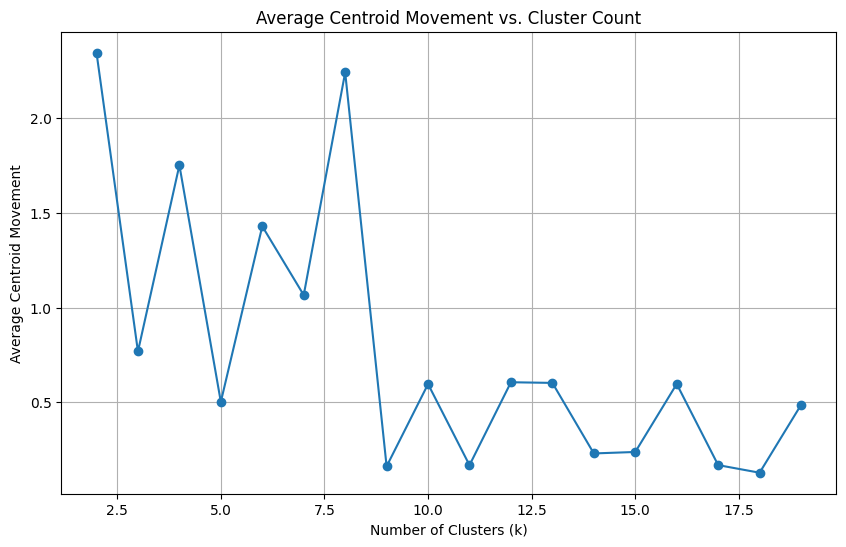

In [22]:
# Determine the optimal number of clusters using the elbow method
kneedle = KneeLocator(range(1, 20), sse, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f"The optimal number of clusters is: {optimal_k}")

# Plot the average centroid movement against cluster count
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), centroid_movements, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Centroid Movement')
plt.title('Average Centroid Movement vs. Cluster Count')
plt.grid(True)
plt.show()

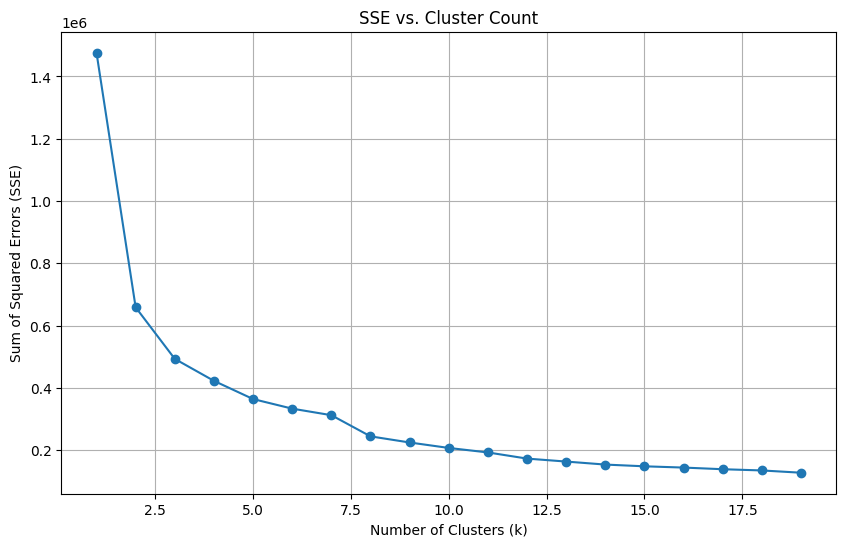

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Cluster Count')
plt.grid(True)
plt.show()

In [35]:
# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Get the cluster labels
labels = kmeans.labels_

In [36]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

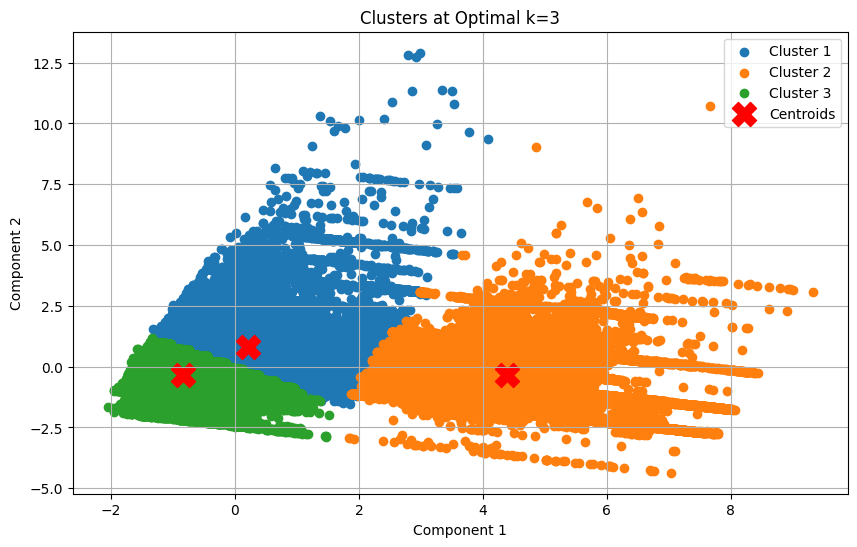

In [37]:
plt.figure(figsize=(10, 6))

# Plot each cluster
for i in range(optimal_k):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Cluster {i+1}')

# Plot the centroids
centroids = pca.transform(kmeans.cluster_centers_) if isinstance(reduced_data, np.ndarray) else kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Clusters at Optimal k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(scaled_data)

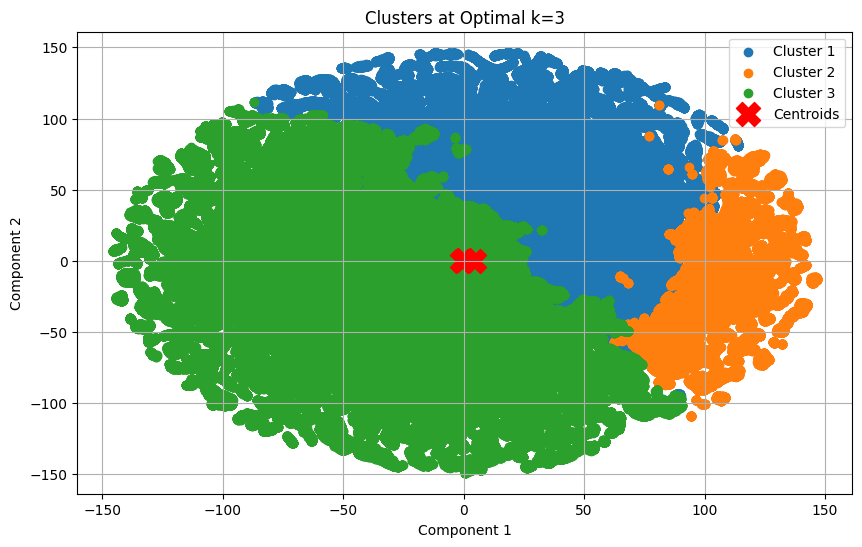

In [39]:
plt.figure(figsize=(10, 6))

# Plot each cluster
for i in range(optimal_k):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Cluster {i+1}')

# Plot the centroids
centroids = pca.transform(kmeans.cluster_centers_) if isinstance(reduced_data, np.ndarray) else kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Clusters at Optimal k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()